# Skråkast med luftmotstand

Vi husker fra tidligere at draget, foråsaket av luftmotstand til et objekt, kan utrykkes som

$$F_{D}\,=\,{\tfrac {1}{2}}\,\rho \,C_{D}\,A\,v^{2}$$

der:
-  $C_D$ er dragkoeffisienten for legemet
-  $\rho$ (gresk bokstav rho) er mediets (gassens eller væskens) tetthet
-  $A$ er arealet av det tverrsnittet av legemet som står normalt på (på tvers av) strømningsretningen
-  $v$ er legemets relative hastighet i forhold til mediet (gassen eller væsken)

Alt bortsett fra farten $v$ er konstanter. For å forenkle notasjonen i utregningen setter vi nå alle konstantene lik $B$

$$F_{D}\,=\,{\tfrac {1}{2}}\,\rho \,C_{D}\,A\,v^{2} = B \,v^{2}$$

I dette eksempelet har vi flyttet oss over i to dimensjoner. Ballen/raketten beveger seg i x-y-planet. Det betyr at vi må definere draget ut fra retningen til ballen/raketten. 

<img src='retning.png' width='200px' style='float:right'>


$$F_{D_x}\,=\,B\,v^{2} \,sin(\theta)$$

$$F_{D_y}\,=\,B\,v^{2}\,cos(\theta)$$

Vi vet at $sin(\theta)=\tfrac{v_x}{v}$ og $cos(\theta)=\tfrac{v_y}{v}$. Satt inn i ligningene over får vi da

$$F_{D_x}\,=\,B\,v^{2}\, \frac{v_x}{v} = \,B\,v\, v_x $$

$$F_{D_y}\,=\,B\,v^{2}\,\frac{v_y}{v} = \,B\,v\, v_y $$


Newtons andre lov gir oss, når vi vet at tyngdekraften kun påvirker ballen/raketten i y-retning
<img src='krefter.png' width='400px' style='float:right'>


$$m\, a_x = -\,B\,v\, v_x $$

$$a_x = -\, \frac{B\,v\, v_x}{m} $$

$$v^\prime_x = -\, \frac{B\,v\, v_x}{m} $$


og


$$m\, a_y = -\,B\,v\, v_y  - mg$$

$$a_y = -\, \frac{B\,v\, v_y}{m}  - g$$


$$v^\prime_y = -\, \frac{B\,v\, v_y}{m}  - g$$


der


$$v=\sqrt{v_x^2 + v_y^2}$$


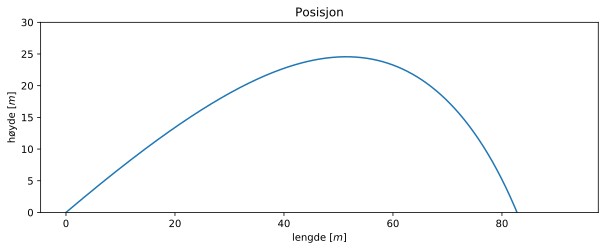

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'
plt.rcParams['figure.figsize'] = (10, 3.5)

# ----------------    Fysiske størelse  --------------------

g = 9.81                   # Gravitasjon [m/s^2]
v_0 = 60.0                 # Uskytingsfart [m/s]
Θ = np.pi/5                # Uskytingsvinkel [radianer]
m = 0.3                    # Massen til raketten [kg]
ρ = 1.2                    # Tettheten til lufta [kg/m^3]
C_d = 0.28                 # Dragkoofesienten 
A = 3.14*0.05**2           # Tversnitt til raketten [m^2]
B = ρ*C_d*A*2              # Samler konstantene i B

# ----------------    Tidsintervaller  --------------------

T  = 6                     # Tid [s]
Δt = 0.005                 # Tidssteg [s]
N  = round(T/Δt)           # Antall tidssteg
x  = np.zeros(N)           # Posisjonsarray x-retning [m]
y  = np.zeros(N)           # Posisjonsarray y-retning [m]
vx = np.zeros(N)           # Fartsarray x-retning [m/s]
vy = np.zeros(N)           # Fartsarray y-retning [m/s]
v  = np.zeros(N)           # Fartsarray [m/s]
t  = np.linspace(0, T, N)  # Tidsarray [s]


# ----------------  Startverdier  --------------------

v[0]  = v_0                # Startfarten i utskytingsretningen
vx[0] = v_0*np.cos(Θ)      # Startfart i x-retning
vy[0] = v_0*np.sin(Θ)      # Startfart i y-retning


# ----------------  Eulers metode  --------------------

for i in range(N - 1):
    
    x[i + 1] = x[i] + vx[i]*Δt
    y[i + 1] = y[i] + vy[i]*Δt
    
    v[i] = np.sqrt(vx[i]**2 + vy[i]**2)
    
    vx[i + 1] = vx[i] - B*v[i]*vx[i]*Δt/m        
    vy[i + 1] = vy[i] - B*v[i]*vy[i]*Δt/m - g*Δt 
    

plt.xlabel('lengde $[m]$')     # Merker x-aksen
plt.ylabel('høyde $[m]$')      # Merker y-aksen
plt.title('Posisjon')          # Tittel
plt.plot(x, y)
plt.ylim(0, 30)
plt.show()

In [10]:
1

1